In [3]:
import matplotlib.pyplot as plt
import numpy as np
from general_code_and_catalogs.LASSOS_Py.data.ace import read_ace_mag
from general_code_and_catalogs.LASSOS_Py.data.ace import read_ace_ion
from general_code_and_catalogs.LASSOS_Py.data.ace import read_ace_epam
from general_code_and_catalogs.LASSOS_Py.data.ace import read_ace_swics
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
start=  '2012-07-15 00:00:00'#'2021-10-14 00:00:00' #solo
end=  '2012-07-19 00:00:00'#'2021-10-16 12:00:00'  #   


dfm= read_ace_mag( datetime.strptime(start, "%Y-%m-%d %H:%M:%S"),datetime.strptime(end, "%Y-%m-%d %H:%M:%S"))
dfp= read_ace_ion( datetime.strptime(start, "%Y-%m-%d %H:%M:%S"),datetime.strptime(end, "%Y-%m-%d %H:%M:%S"))
dfe=read_ace_epam( datetime.strptime(start, "%Y-%m-%d %H:%M:%S"),datetime.strptime(end, "%Y-%m-%d %H:%M:%S"))
dfs=read_ace_swics( datetime.strptime(start, "%Y-%m-%d %H:%M:%S"),datetime.strptime(end, "%Y-%m-%d %H:%M:%S"))


AttributeError: 'Axes' object has no attribute 'y_label'

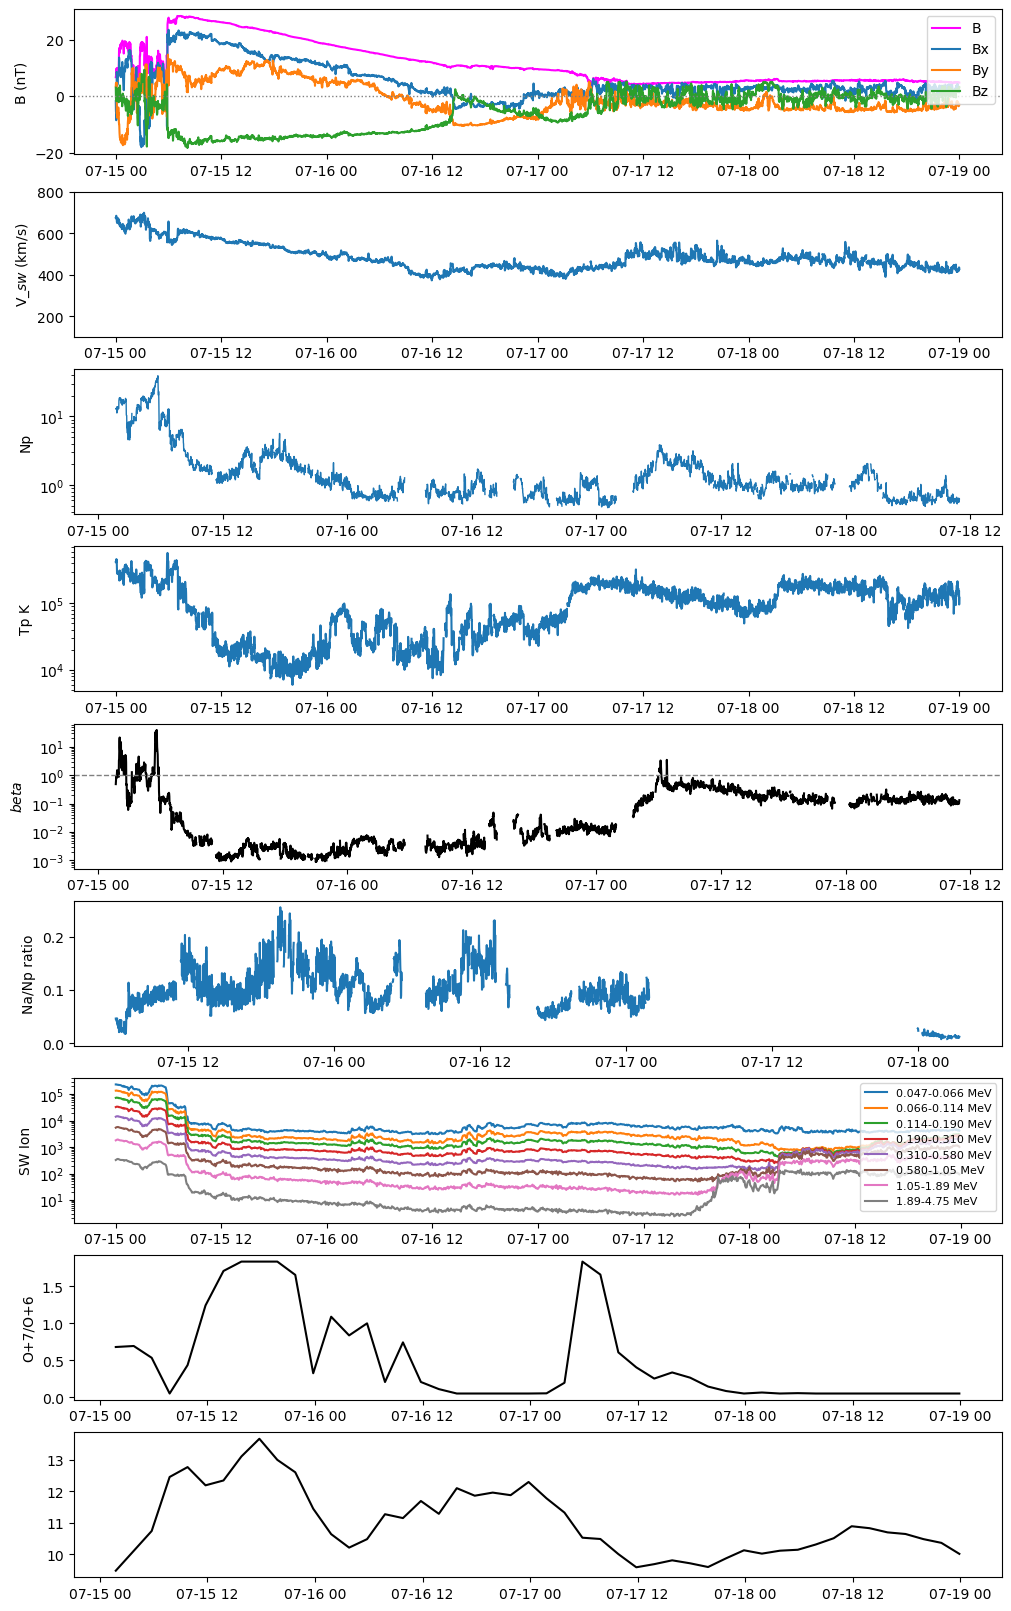

In [22]:

fig, axs = plt.subplots(9,1,figsize=(10, 16),layout='constrained')
axs[0].plot(dfm.index,dfm.B,label='B',color='magenta')
axs[0].plot(dfm.index,dfm.Bx,label='Bx')
axs[0].plot(dfm.index,dfm.By,label='By')
axs[0].plot(dfm.index,dfm.Bz,label='Bz')
axs[0].set_ylabel('B (nT)')
axs[0].axhline(y=0,color='gray',linewidth=1,linestyle=':')
axs[0].legend(loc='upper right')
axs[1].plot(dfp.index,dfp.Vsw)
axs[1].set_ylabel('V_${sw}$ (km/s)')
axs[1].set_ylim([100,800])
axs[2].plot(dfp.index,dfp.Np, lw=1)
axs[2].set_yscale('log')
axs[2].set_ylabel('Np')
axs[3].plot(dfp.index,dfp.Tp)
axs[3].set_yscale("log") 
axs[3].set_ylabel('Tp K')
Kb=1.38e-16
dfp=dfp.resample('s').ffill().resample('64s').mean()
dfm=dfm.resample('s').ffill().resample('64s').mean()
beta=dfp.Np*Kb*dfp.Tp/((dfm.B*1e-5)**2/8/np.pi)
axs[4].plot(dfp.index,(beta),c='k')
axs[4].set_yscale('log')
axs[4].set_ylabel('$beta$')
axs[4].axhline(y=1,color='gray',linewidth=1,linestyle='--')
axs[5].plot(dfp.index,dfp.alpha_ratio)
axs[5].set_ylabel('Na/Np ratio')
axs[6].plot(dfe.index,dfe.P1p,label='0.047-0.066 MeV')
axs[6].plot(dfe.index,dfe.P2p,label='0.066-0.114 MeV')
axs[6].plot(dfe.index,dfe.P3p,label='0.114-0.190 MeV')
axs[6].plot(dfe.index,dfe.P4p,label='0.190-0.310 MeV')
axs[6].plot(dfe.index,dfe.P5p,label='0.310-0.580 MeV')
axs[6].plot(dfe.index,dfe.P6p,label='0.580-1.05 MeV')
axs[6].plot(dfe.index,dfe.P7p,label='1.05-1.89 MeV')
axs[6].plot(dfe.index,dfe.P8p,label='1.89-4.75 MeV')
axs[6].legend(loc='upper right', fontsize=8)
axs[6].set_yscale("log")
axs[6].set_ylabel('SW Ion')
axs[7].plot(dfs.index,dfs.O7to6,color='k')
axs[7].set_ylabel('O+7/O+6')
axs[8].plot(dfs.index,dfs.avqFe,color='k',label='<Q>Fe')
axs[8].set_ylabel('<Q>Fe')
axs[8].axhline(y=12,color='gray',linewidth=1,linestyle='--')
for i in range(0,8):
    axs[i].set_xlim(datetime.strptime(start, "%Y-%m-%d %H:%M:%S"), datetime.strptime(end, "%Y-%m-%d %H:%M:%S"))

    # axs[i].axvline(datetime.strptime('2021-11-04 07:00:00', "%Y-%m-%d %H:%M:%S"),  linestyle=':', lw=2,color='k')
